In [144]:
import sentimentScore

df = sentimentScore.get_score("M5iHI0nsVZc")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [145]:
df = df.rename(columns={'Number of Likes': 'Likes'})

In [24]:
import matplotlib.pyplot as plt
import  seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
from textwrap import wrap

c:\Users\araf7\OneDrive\Desktop\Youtube Comment Sentiment Analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\araf7\OneDrive\Desktop\Youtube Comment Sentiment Analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


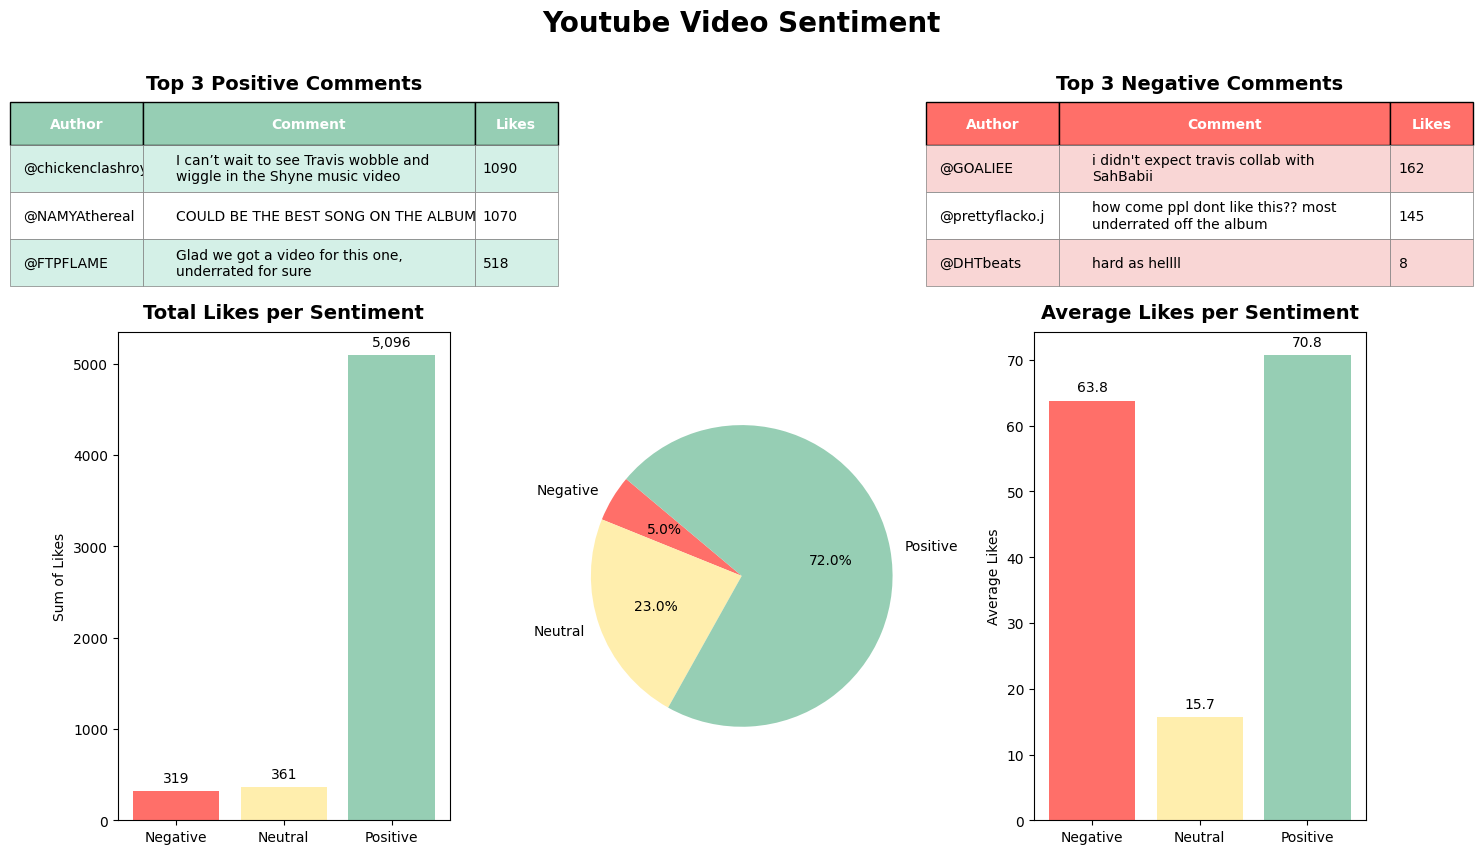

In [146]:
# Pie chart data
sentiment_counts = df['Predicted_class'].value_counts().sort_index()
sentiment_labels = ['Negative', 'Neutral', 'Positive']
colors = ['#ff6f69', '#ffeead', '#96ceb4']

# Get top 3 positive and negative comments, including Author and Likes column
top_pos = df[df['Predicted_class'] == 2].nlargest(3, 'Likes')[['Author', 'Comment', 'Likes']]
top_neg = df[df['Predicted_class'] == 0].nlargest(3, 'Likes')[['Author', 'Comment', 'Likes']]

# Wrap comments to avoid clipping
def wrap_comments(comments, width=40):
    return ['\n'.join(wrap(str(c), width)) for c in comments]

top_pos['Comment'] = wrap_comments(top_pos['Comment'])
top_neg['Comment'] = wrap_comments(top_neg['Comment'])

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(4, 3, height_ratios=[0.5, 1, 1, 2])

# Main big title at the top spanning all columns
fig.suptitle("Youtube Video Sentiment", fontsize=20, fontweight='bold', y=0.85)

def prettify_table(ax, data, title, header_color, row_colors):
    ax.axis('off')
    table = ax.table(cellText=data.values,
                     colLabels=data.columns,
                     cellLoc='left',
                     loc='center',
                     colColours=[header_color] * len(data.columns),
                     colWidths=[0.4, 1, 0.25]) 
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor(header_color)
            cell.set_height(0.1)
        else:
            cell.set_facecolor(row_colors[(row - 1) % len(row_colors)])
            cell.set_linewidth(0.5)
            cell.set_edgecolor('gray')
            if col == 2:
                cell._loc = 'center'
            else:
                cell._loc = 'left'

    table.scale(1, 3)
    # Move title a bit up so it's above the table nicely
    ax.set_title(title, fontsize=14, pad=25, fontweight="bold")
    return table

# Top Positive Comments Table moved to second row, first col
ax_pos = fig.add_subplot(gs[1, 0])
prettify_table(ax_pos, top_pos, "Top 3 Positive Comments", header_color='#96ceb4', row_colors=['#d4f0e7', 'white'])

# Top Negative Comments Table moved to second row, third col
ax_neg = fig.add_subplot(gs[1, 2])
prettify_table(ax_neg, top_neg, "Top 3 Negative Comments", header_color='#ff6f69', row_colors=['#f9d6d5', 'white'])

# Calculate sum of likes per sentiment class
likes_sum = df.groupby('Predicted_class')['Likes'].sum().reindex([0,1,2])
# Convert to labels order

likes_sum = likes_sum.fillna(0)

# Sum of likes per class
ax_bar = fig.add_subplot(gs[2:, 0])
ax_bar.bar(sentiment_labels, likes_sum, color=colors)
ax_bar.set_title("Total Likes per Sentiment", fontsize=14, fontweight="bold",pad="10")
ax_bar.set_ylabel("Sum of Likes")
max_likes = likes_sum.max()
for i, total_likes in enumerate(likes_sum):
    ax_bar.text(i, total_likes + max_likes*0.02, f"{total_likes:,}", ha='center', fontsize=10)

likes_avg = df.groupby('Predicted_class')['Likes'].mean().reindex([0,1,2]).fillna(0)
# Average likes per class
ax_avg = fig.add_subplot(gs[2:, 2])
ax_avg.bar(sentiment_labels, likes_avg, color=colors)
ax_avg.set_title("Average Likes per Sentiment", fontsize=14, fontweight='bold',pad="10")
ax_avg.set_ylabel("Average Likes")
max_avg = likes_avg.max()
for i, avg_likes in enumerate(likes_avg):
    ax_avg.text(i, avg_likes + max_avg*0.02, f"{avg_likes:.1f}", ha='center', fontsize=10)

# Pie chart now on rows 2 and 3, column 1 (middle bottom big block)
ax_pie = fig.add_subplot(gs[2:, 1])
ax_pie.pie(sentiment_counts, labels=sentiment_labels, colors=colors, autopct='%1.1f%%', startangle=140)
ax_pie.axis('equal')  # keep circle shape

plt.tight_layout(rect=[0, 0, 1, 0.93])  # leave space for suptitle
plt.show()